# August

## 23th

### (M) 47. Permutations II

77 / 50

In [ ]:
from typing import List
nums = [1,1,2,3, 3]
nums = sorted(nums)

class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:
      
      self.res = []
      def backtrack(arr, permut):
        if arr == []: self.res.append(permut); return

        tmp = None
        for idx in range(len(arr)):
          if tmp != arr[idx]:
            tmp = arr[idx]
            backtrack(arr[:idx] + arr[idx + 1:], permut + [arr[idx]])

      backtrack(sorted(nums), [])
      return self.res

Solution().permuteUnique(nums)

30

Passing a sliced list to the next recursive function call may be inefficient in terms of time complexity.

Incredible solution from [LeetCode discussion](https://leetcode.com/problems/permutations-ii/discuss/18602/9-line-python-solution-with-1-line-to-handle-duplication-beat-99-of-others-%3A-)) - 74 / 100

In [ ]:
class Solution:
    def permuteUnique(self, nums):
        ans = [[]]
        for n in nums:
            ans = [l[:i]+[n]+l[i:]
                   for l in ans
                   for i in range((l+[n]).index(n)+1)]
        return ans

## 24th

### (E) 389. Find the Difference

30 / 76

In [ ]:
from collections import Counter

s = ''
t = 'a'

class Solution:
    def findTheDifference(self, s: str, t: str) -> str:
        
        cnt = Counter(t)
        for char in s:
          if char in cnt:
            cnt[char] -= 1
            if cnt[char] == 0:
              cnt.pop(char)

          else: # if not in cnt
            return char

        return list(cnt.keys())[0]
        
Solution().findTheDifference(s, t)

'a'

One-liner solution focused on running time -  60 / 40

In [ ]:
from collections import Counter

s = ''
t = 'a'

class Solution:
    def findTheDifference(self, s: str, t: str) -> str:
        
        return list((Counter(t) - Counter(s)).keys())[0]
        
Solution().findTheDifference(s, t)

'a'

Awesome solution from [LeetCode discussion](https://leetcode.com/problems/find-the-difference/discuss/86845/1-liners-and-2-liner-in-Python)

In [ ]:
from functools import reduce

class Solution(object):
    def findTheDifference(self, s, t):
        return chr(reduce(operator.xor, map(ord, s + t)))
Solution().findTheDifference(s, t)

### (M) 1448. Count Good Nodes in Binary Tree

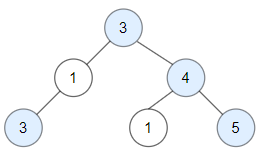

In [ ]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
root = TreeNode(3)
root.left = TreeNode(1)
root.right = TreeNode(4)
root.left.left = TreeNode(3)
root.right.left = TreeNode(1)
root.right.right = TreeNode(5)

In [ ]:
root = TreeNode(3)
root.left = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(2)

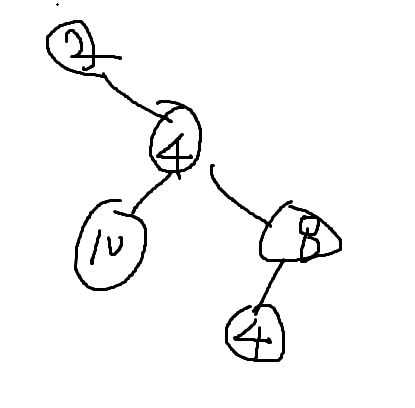

In [ ]:
root = TreeNode(2)
root.right = TreeNode(4)
root.right.left = TreeNode(10)
root.right.right = TreeNode(8)
root.right.right.left = TreeNode(4)

# answer : 4

Recursive approach - 30 / 50

In [ ]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:

      self.score = 0
      def PreorderTraverse(Node, threshold):

        if Node.val >= threshold:
          self.score += 1

        if Node.left != None:
          PreorderTraverse(Node.left, max(Node.val, threshold))
        if Node.right != None:
          PreorderTraverse(Node.right, max(Node.val, threshold))
        return

      PreorderTraverse(root, root.val)
      return self.score

Solution().goodNodes(root)

4

Iterative approach (Why is this slower than recursion solution?) - 25 / 20

In [ ]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        cnt = 0
        stack = [(root, root.val)]
        while stack:
            cur, current_max = stack.pop()
            cnt += cur.val >= current_max
            for child in cur.left, cur.right:
                if child:
                    stack.append((child, max(cur.val, current_max)))
        return cnt